In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from numpy import pi

## Codigo de 3 qubits para correción de error de amplitud

Mediante esta codificación seremos capaz de detectar y corregir un error de amplitud en cualquiera de nuestros tres qubits, utlizando dos qubits ancilla. Codificaremos un circuito con el mismo error, pero sin aplicar correción de errores para comparar los resultados.

In [2]:
def errorAmplitud(circuit, qreg_q):
    circuit.barrier()
    circuit.x(qreg_q[0])    
    circuit.barrier()

### Creación e inicialización del circuito

Circuito con correción de errores

In [3]:
qreg_q_3qubits = QuantumRegister(3, 'q')
qreg_q_ancilla_3qubits  = QuantumRegister(2, 'q_ancilla')
creg_registro_3qubits  = ClassicalRegister(3, 'registro')
creg_sindrome_3qubits  = ClassicalRegister(2, 'sindrome')
circuit_3qubits  = QuantumCircuit(qreg_q_3qubits , qreg_q_ancilla_3qubits , creg_registro_3qubits , creg_sindrome_3qubits )
circuit_3qubits.barrier()

Circuito sin correción de errores

In [4]:
qreg_q_3qubits_errores = QuantumRegister(3, 'q')
creg_registro_3qubits_errores = ClassicalRegister(3, 'registro')
circuit_3qubits_errores = QuantumCircuit(qreg_q_3qubits_errores, creg_registro_3qubits_errores)
circuit_3qubits_errores.barrier()

### Codificación

Circuito con correción de errores

In [5]:
circuit_3qubits.cx(qreg_q_3qubits[0], qreg_q_3qubits[1])
circuit_3qubits.cx(qreg_q_3qubits[0], qreg_q_3qubits[2])

Circuito sin correción de errores

In [6]:
circuit_3qubits_errores.cx(qreg_q_3qubits_errores[0], qreg_q_3qubits_errores[1])
circuit_3qubits_errores.cx(qreg_q_3qubits_errores[0], qreg_q_3qubits_errores[2])

### Introducimos el error en ambos circuitos

In [7]:
errorAmplitud(circuit_3qubits, qreg_q_3qubits)
errorAmplitud(circuit_3qubits_errores, qreg_q_3qubits_errores)

### Detección sindrome 

Solo lo aplicaremos en el circuito con correción de errores. También mediremos los qubits ancilla.

In [8]:
circuit_3qubits.cx(qreg_q_3qubits[0], qreg_q_ancilla_3qubits[0])
circuit_3qubits.cx(qreg_q_3qubits[0], qreg_q_ancilla_3qubits[1])
circuit_3qubits.cx(qreg_q_3qubits[1], qreg_q_ancilla_3qubits[0])
circuit_3qubits.cx(qreg_q_3qubits[2], qreg_q_ancilla_3qubits[1])
circuit_3qubits.barrier()

circuit_3qubits.measure(qreg_q_ancilla_3qubits[0], creg_sindrome_3qubits[0])
circuit_3qubits.measure(qreg_q_ancilla_3qubits[1], creg_sindrome_3qubits[1])
circuit_3qubits.barrier()

### Algoritmo de correción de errores y medición

In [9]:
circuit_3qubits.x(qreg_q_3qubits[2]).c_if(creg_sindrome_3qubits, 2)
circuit_3qubits.x(qreg_q_3qubits[1]).c_if(creg_sindrome_3qubits, 1)
circuit_3qubits.x(qreg_q_3qubits[0]).c_if(creg_sindrome_3qubits, 3)
circuit_3qubits.barrier()



### Medición y obtención de resultados mediante simulación

Circuito sin errores

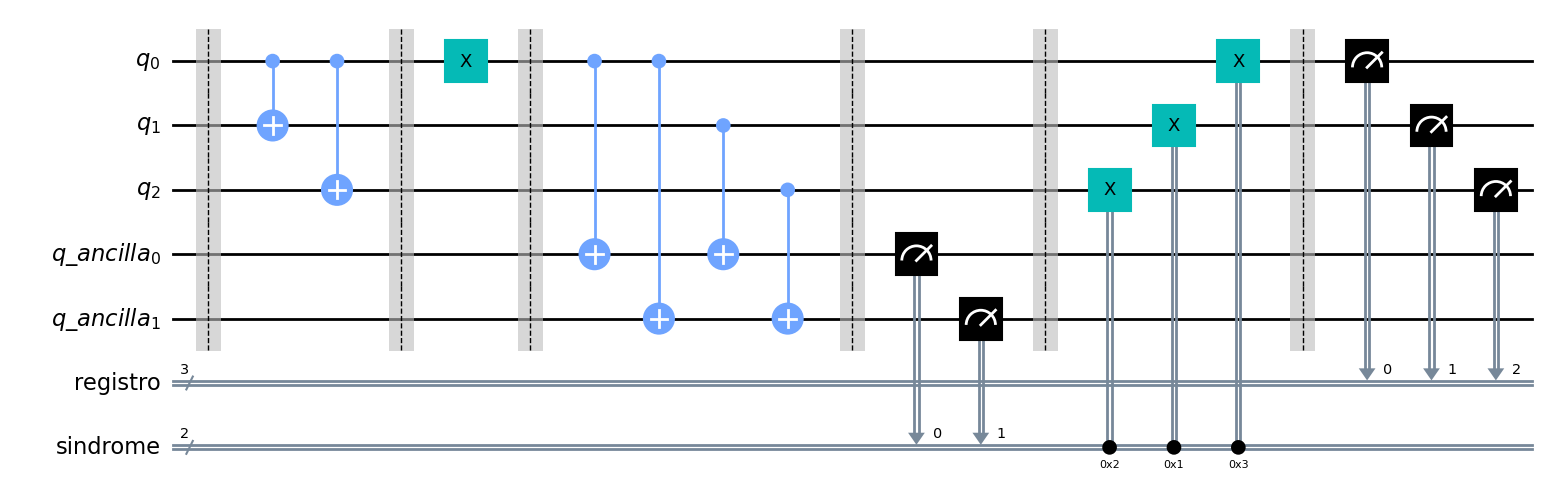

In [10]:
circuit_3qubits.measure(qreg_q_3qubits[0], creg_registro_3qubits[0])
circuit_3qubits.measure(qreg_q_3qubits[1], creg_registro_3qubits[1])
circuit_3qubits.measure(qreg_q_3qubits[2], creg_registro_3qubits[2])

circuit_3qubits.draw(output='mpl', style="clifford")

Circuito con errores

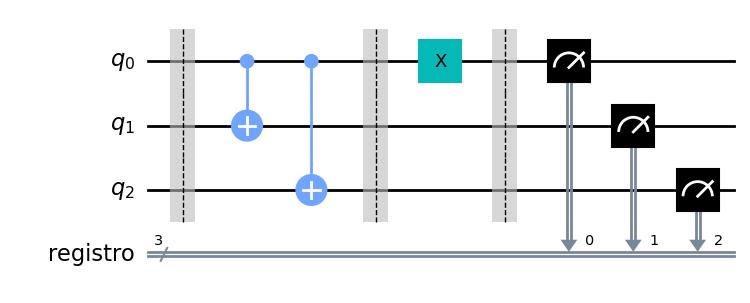

In [11]:
circuit_3qubits_errores.measure(qreg_q_3qubits_errores[0], creg_registro_3qubits_errores[0])
circuit_3qubits_errores.measure(qreg_q_3qubits_errores[1], creg_registro_3qubits_errores[1])
circuit_3qubits_errores.measure(qreg_q_3qubits_errores[2], creg_registro_3qubits_errores[2])

circuit_3qubits_errores.draw(output='mpl', style="clifford")

Simulación y obtención de resultados

In [12]:
result_3qubits = execute(circuit_3qubits, Aer.get_backend('qasm_simulator')).result()
print("Resultado circuito con correción de errores: ")
print(result_3qubits.get_counts())

Resultado circuito con correción de errores: 
{'11 000': 1024}


In [13]:
result_sincorregir3qubits = execute(circuit_3qubits_errores, Aer.get_backend('qasm_simulator')).result()
print("Resultado circuito sin correción de errores: ")
print(result_sincorregir3qubits.get_counts())

Resultado circuito sin correción de errores: 
{'001': 1024}


## Codigo de 3 qubits para correción de error de fase

De manera similar a la codificación anterior, contruiremos un circuito capaz de corregir errores de fase en cualquiera de los 3 qubits.

In [14]:
def errorFase(circuit, qreg_q):
    circuit.barrier()
    circuit.z(qreg_q[0])    
    circuit.barrier()

### Creación e inicialización del circuito

Circuito con correción de errores

In [15]:
qreg_q_3fase = QuantumRegister(3, 'q')
qreg_q_ancilla_3fase  = QuantumRegister(2, 'q_ancilla')
creg_registro_3fase  = ClassicalRegister(3, 'registro')
creg_sindrome_3fase  = ClassicalRegister(2, 'sindrome')
circuit_3fase  = QuantumCircuit(qreg_q_3fase , qreg_q_ancilla_3fase , creg_registro_3fase , creg_sindrome_3fase )
circuit_3fase.barrier()

Circtuito sin correción de errores

In [16]:
qreg_q_3fase_errores = QuantumRegister(3, 'q')
creg_registro_3fase_errores = ClassicalRegister(3, 'registro')
circuit_3fase_errores = QuantumCircuit(qreg_q_3fase_errores, creg_registro_3fase_errores)
circuit_3fase_errores.barrier()

### Codificación

Circuito con correción de errores

In [17]:
circuit_3fase.cx(qreg_q_3fase[0], qreg_q_3fase[1])
circuit_3fase.cx(qreg_q_3fase[0], qreg_q_3fase[2])
circuit_3fase.h(qreg_q_3fase[0])
circuit_3fase.h(qreg_q_3fase[1])
circuit_3fase.h(qreg_q_3fase[2])

Circuito sin correción de errores

In [18]:

circuit_3fase_errores.h(qreg_q_3fase_errores[0])
circuit_3fase_errores.h(qreg_q_3fase_errores[1])
circuit_3fase_errores.h(qreg_q_3fase_errores[2])
circuit_3fase_errores.cx(qreg_q_3fase_errores[0], qreg_q_3fase_errores[1])
circuit_3fase_errores.cx(qreg_q_3fase_errores[0], qreg_q_3fase_errores[2])

### Introducimos el error en ambos circuitos

In [19]:
errorFase(circuit_3fase,qreg_q_3fase)
errorFase(circuit_3fase_errores,qreg_q_3fase_errores)

### Detección del sindrome

Solo lo aplicaremos en el circuito con correción de errores. También mediremos los qubits ancilla.

In [20]:
circuit_3fase.h(qreg_q_3fase[0])
circuit_3fase.h(qreg_q_3fase[1])
circuit_3fase.h(qreg_q_3fase[2])
circuit_3fase.cx(qreg_q_3fase[0], qreg_q_ancilla_3fase[0])
circuit_3fase.cx(qreg_q_3fase[0], qreg_q_ancilla_3fase[1])
circuit_3fase.cx(qreg_q_3fase[1], qreg_q_ancilla_3fase[0])
circuit_3fase.cx(qreg_q_3fase[2], qreg_q_ancilla_3fase[1])

circuit_3fase.barrier()
circuit_3fase.measure(qreg_q_ancilla_3fase[0], creg_sindrome_3fase[0])
circuit_3fase.measure(qreg_q_ancilla_3fase[1], creg_sindrome_3fase[1])
circuit_3fase.barrier()

Decodificación para obtener qubit físico en circuito sin correción de errores.

In [21]:
circuit_3fase_errores.h(qreg_q_3fase_errores[0])
circuit_3fase_errores.h(qreg_q_3fase_errores[1])
circuit_3fase_errores.h(qreg_q_3fase_errores[2])
circuit_3fase_errores.cx(qreg_q_3fase_errores[0], qreg_q_3fase_errores[1])
circuit_3fase_errores.cx(qreg_q_3fase_errores[0], qreg_q_3fase_errores[2])

### Algoritmo de correción de errores y medición

In [22]:
circuit_3fase.h(qreg_q_3fase[0])
circuit_3fase.h(qreg_q_3fase[1])
circuit_3fase.h(qreg_q_3fase[2])
circuit_3fase.z(qreg_q_3fase[2]).c_if(creg_sindrome_3fase, 2)
circuit_3fase.z(qreg_q_3fase[1]).c_if(creg_sindrome_3fase, 1)
circuit_3fase.z(qreg_q_3fase[0]).c_if(creg_sindrome_3fase, 3)
circuit_3fase.barrier()
circuit_3fase.h(qreg_q_3fase[0])
circuit_3fase.h(qreg_q_3fase[1])
circuit_3fase.h(qreg_q_3fase[2])

### Medición y obtención de resultados mediante simulación

Circuto con correción de errores

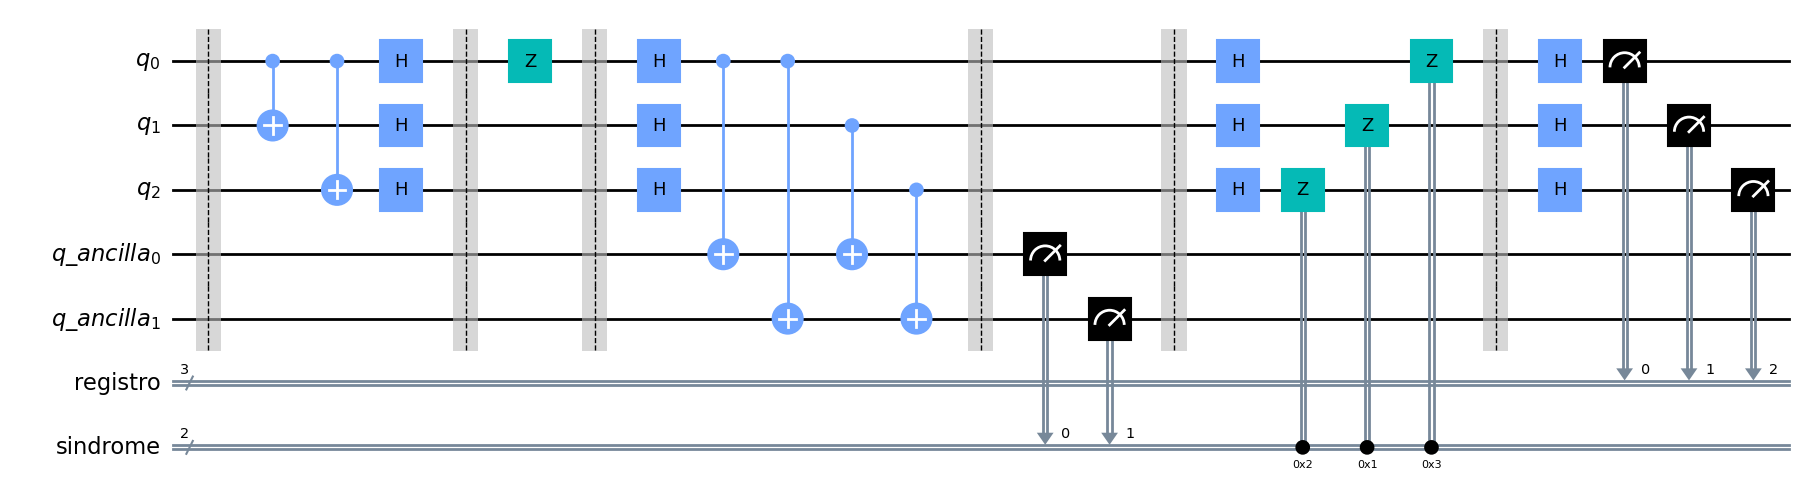

In [23]:
circuit_3fase.measure(qreg_q_3fase[0], creg_registro_3fase[0])
circuit_3fase.measure(qreg_q_3fase[1], creg_registro_3fase[1])
circuit_3fase.measure(qreg_q_3fase[2], creg_registro_3fase[2])

circuit_3fase.draw(output='mpl', style="clifford")

Circuito sin correción de errores

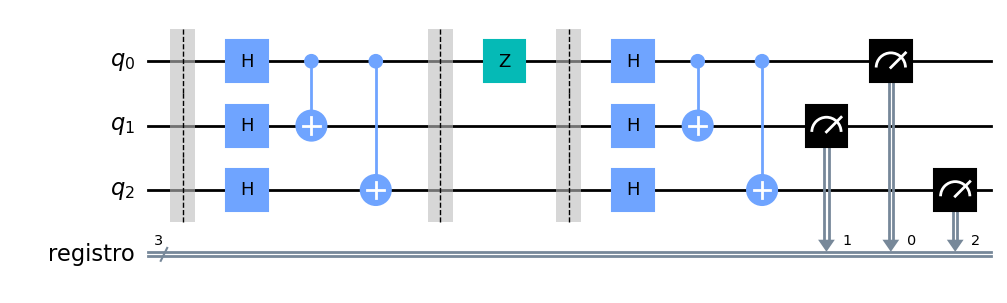

In [24]:
circuit_3fase_errores.measure(qreg_q_3fase_errores[0], creg_registro_3fase_errores[0])
circuit_3fase_errores.measure(qreg_q_3fase_errores[1], creg_registro_3fase_errores[1])
circuit_3fase_errores.measure(qreg_q_3fase_errores[2], creg_registro_3fase_errores[2])

circuit_3fase_errores.draw(output='mpl', style="clifford")

Simulación y obtención de resultados

In [25]:
result_sincorregir3fase = execute(circuit_3fase_errores, Aer.get_backend('qasm_simulator')).result()
print("Resultado circuito sin correción de errores: ")
print(result_sincorregir3fase.get_counts())

Resultado circuito sin correción de errores: 
{'111': 1024}


In [26]:
result_3fase = execute(circuit_3fase, Aer.get_backend('qasm_simulator')).result()
print("Resultado circuito con correción de errores: ")
print(result_3fase.get_counts())

Resultado circuito sin correción de errores: 
{'11 000': 1024}


## Codigo de Shor para correción de errores

Para poder comparar el funcionamiento de la correción de erroes, crearemos un circuito con la correción de errores y otro sin corregir para compararlos. 

In [27]:
def errorShor(circuit,qreg_q):
    circuit.barrier()
    circuit.z(qreg_q[5])
    #circuit.x(qreg_q[4])
    #circuit.z(qreg_q[3])
    circuit.barrier()

### Inicializamos el circuito y el circuito sin corregir<a name="id1"></a>

Circuito con correción de errores:

In [28]:
qreg_q = QuantumRegister(9, 'q')
qreg_q_ancilla = QuantumRegister(8, 'q_ancilla')
creg_c = ClassicalRegister(9, 'c')
creg_sindrome1 = ClassicalRegister(2, 'sindrome1')
creg_sindrome2 = ClassicalRegister(2, 'sindrome2')
creg_sindrome3 = ClassicalRegister(2, 'sindrome3')
creg_sindrome4 = ClassicalRegister(2, 'sindrome4')
circuit = QuantumCircuit(qreg_q, qreg_q_ancilla, creg_c, creg_sindrome1, creg_sindrome2, creg_sindrome3, creg_sindrome4)

Circuito sin correción de errores

In [29]:
qreg_q_sincorregir = QuantumRegister(9, 'q_sincorregir')
creg_c_sincorregir = ClassicalRegister(9, 'c_sincorregir')
circuit_sincorregir = QuantumCircuit(qreg_q_sincorregir, creg_c_sincorregir)

### Codificación de ambos cricuitos para obtener los qubits lógicos que necesitamos<a name="id2"></a>

Circuito con correción de errores

In [30]:
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[6])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[6])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[6], qreg_q[7])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[6], qreg_q[8])
circuit.cx(qreg_q[0], qreg_q[2])

Circuito sin correción de errores

In [31]:
circuit_sincorregir.cx(qreg_q_sincorregir[0], qreg_q_sincorregir[3])
circuit_sincorregir.cx(qreg_q_sincorregir[0], qreg_q_sincorregir[6])
circuit_sincorregir.h(qreg_q_sincorregir[0])
circuit_sincorregir.h(qreg_q_sincorregir[3])
circuit_sincorregir.h(qreg_q_sincorregir[6])
circuit_sincorregir.cx(qreg_q_sincorregir[3], qreg_q_sincorregir[4])
circuit_sincorregir.cx(qreg_q_sincorregir[6], qreg_q_sincorregir[7])
circuit_sincorregir.cx(qreg_q_sincorregir[0], qreg_q_sincorregir[1])
circuit_sincorregir.cx(qreg_q_sincorregir[3], qreg_q_sincorregir[5])
circuit_sincorregir.cx(qreg_q_sincorregir[6], qreg_q_sincorregir[8])
circuit_sincorregir.cx(qreg_q_sincorregir[0], qreg_q_sincorregir [2])

### Introducimos el error

Para esto utilizamos la función creada al comenienzo del código error()

In [32]:
errorShor(circuit,qreg_q)
errorShor(circuit_sincorregir,qreg_q_sincorregir)

### Detección de sindrome para errores de amplitud

Solo en circuito con correción de errores

In [33]:

circuit.cx(qreg_q[0], qreg_q_ancilla[0])
circuit.cx(qreg_q[0], qreg_q_ancilla[1])
circuit.cx(qreg_q[1], qreg_q_ancilla[0])
circuit.cx(qreg_q[2], qreg_q_ancilla[1])
circuit.barrier()


circuit.cx(qreg_q[3], qreg_q_ancilla[2])
circuit.cx(qreg_q[3], qreg_q_ancilla[3])
circuit.cx(qreg_q[4], qreg_q_ancilla[2])
circuit.cx(qreg_q[5], qreg_q_ancilla[3])
circuit.barrier()

circuit.cx(qreg_q[6], qreg_q_ancilla[4])
circuit.cx(qreg_q[6], qreg_q_ancilla[5])
circuit.cx(qreg_q[7], qreg_q_ancilla[4])
circuit.cx(qreg_q[8], qreg_q_ancilla[5])
circuit.barrier()


### Detección de sindrome para errores de fase

In [34]:
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[6], qreg_q[7])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[6], qreg_q[8])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[6])
circuit.cx(qreg_q[0], qreg_q_ancilla[6])
circuit.cx(qreg_q[0], qreg_q_ancilla[7])
circuit.cx(qreg_q[3], qreg_q_ancilla[6])
circuit.cx(qreg_q[6], qreg_q_ancilla[7])
circuit.barrier()

### Medición del sindrome


In [35]:
circuit.measure(qreg_q_ancilla[0], creg_sindrome1[0])
circuit.measure(qreg_q_ancilla[1], creg_sindrome1[1])
circuit.measure(qreg_q_ancilla[2], creg_sindrome2[0])
circuit.measure(qreg_q_ancilla[3], creg_sindrome2[1])
circuit.measure(qreg_q_ancilla[4], creg_sindrome3[0])
circuit.measure(qreg_q_ancilla[5], creg_sindrome3[1])
circuit.measure(qreg_q_ancilla[6], creg_sindrome4[0])
circuit.measure(qreg_q_ancilla[7], creg_sindrome4[1])
circuit.barrier()

### Algoritmo de correción de errores fase

In [36]:
circuit.x(qreg_q[6]).c_if(creg_sindrome4, 2)
circuit.x(qreg_q[3]).c_if(creg_sindrome4, 1)
circuit.x(qreg_q[0]).c_if(creg_sindrome4, 3)

circuit.barrier()

In [37]:
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[6])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[6], qreg_q[7])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[6], qreg_q[8])
circuit.barrier()



### Algoritmo de correción de errores de amplitud

In [38]:
circuit.x(qreg_q[2]).c_if(creg_sindrome1, 2)
circuit.x(qreg_q[1]).c_if(creg_sindrome1, 1)
circuit.x(qreg_q[0]).c_if(creg_sindrome1, 3)
circuit.barrier()
circuit.x(qreg_q[5]).c_if(creg_sindrome2, 2)
circuit.x(qreg_q[4]).c_if(creg_sindrome2, 1)
circuit.x(qreg_q[3]).c_if(creg_sindrome2, 3)
circuit.barrier()
circuit.x(qreg_q[8]).c_if(creg_sindrome3, 2)
circuit.x(qreg_q[7]).c_if(creg_sindrome3, 1)
circuit.x(qreg_q[6]).c_if(creg_sindrome3, 3)
circuit.barrier()

### Decodificación

Circuito corregido:

In [39]:
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[6], qreg_q[7])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[6], qreg_q[8])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[6])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[6])

circuit.barrier()

Circuito sin corregir

In [40]:
circuit_sincorregir.cx(qreg_q_sincorregir[0], qreg_q_sincorregir[1])
circuit_sincorregir.cx(qreg_q_sincorregir[3], qreg_q_sincorregir[4])
circuit_sincorregir.cx(qreg_q_sincorregir[6], qreg_q_sincorregir[7])
circuit_sincorregir.cx(qreg_q_sincorregir[0], qreg_q_sincorregir[2])
circuit_sincorregir.cx(qreg_q_sincorregir[3], qreg_q_sincorregir[5])
circuit_sincorregir.cx(qreg_q_sincorregir[6], qreg_q_sincorregir[8])
circuit_sincorregir.h(qreg_q_sincorregir[0])
circuit_sincorregir.h(qreg_q_sincorregir[3])
circuit_sincorregir.h(qreg_q_sincorregir[6])
circuit_sincorregir.cx(qreg_q_sincorregir[0], qreg_q_sincorregir[3])
circuit_sincorregir.cx(qreg_q_sincorregir[0], qreg_q_sincorregir[6])

circuit_sincorregir.barrier()

### Medición y obtención de resultados mediante simulación

Circuito corregido

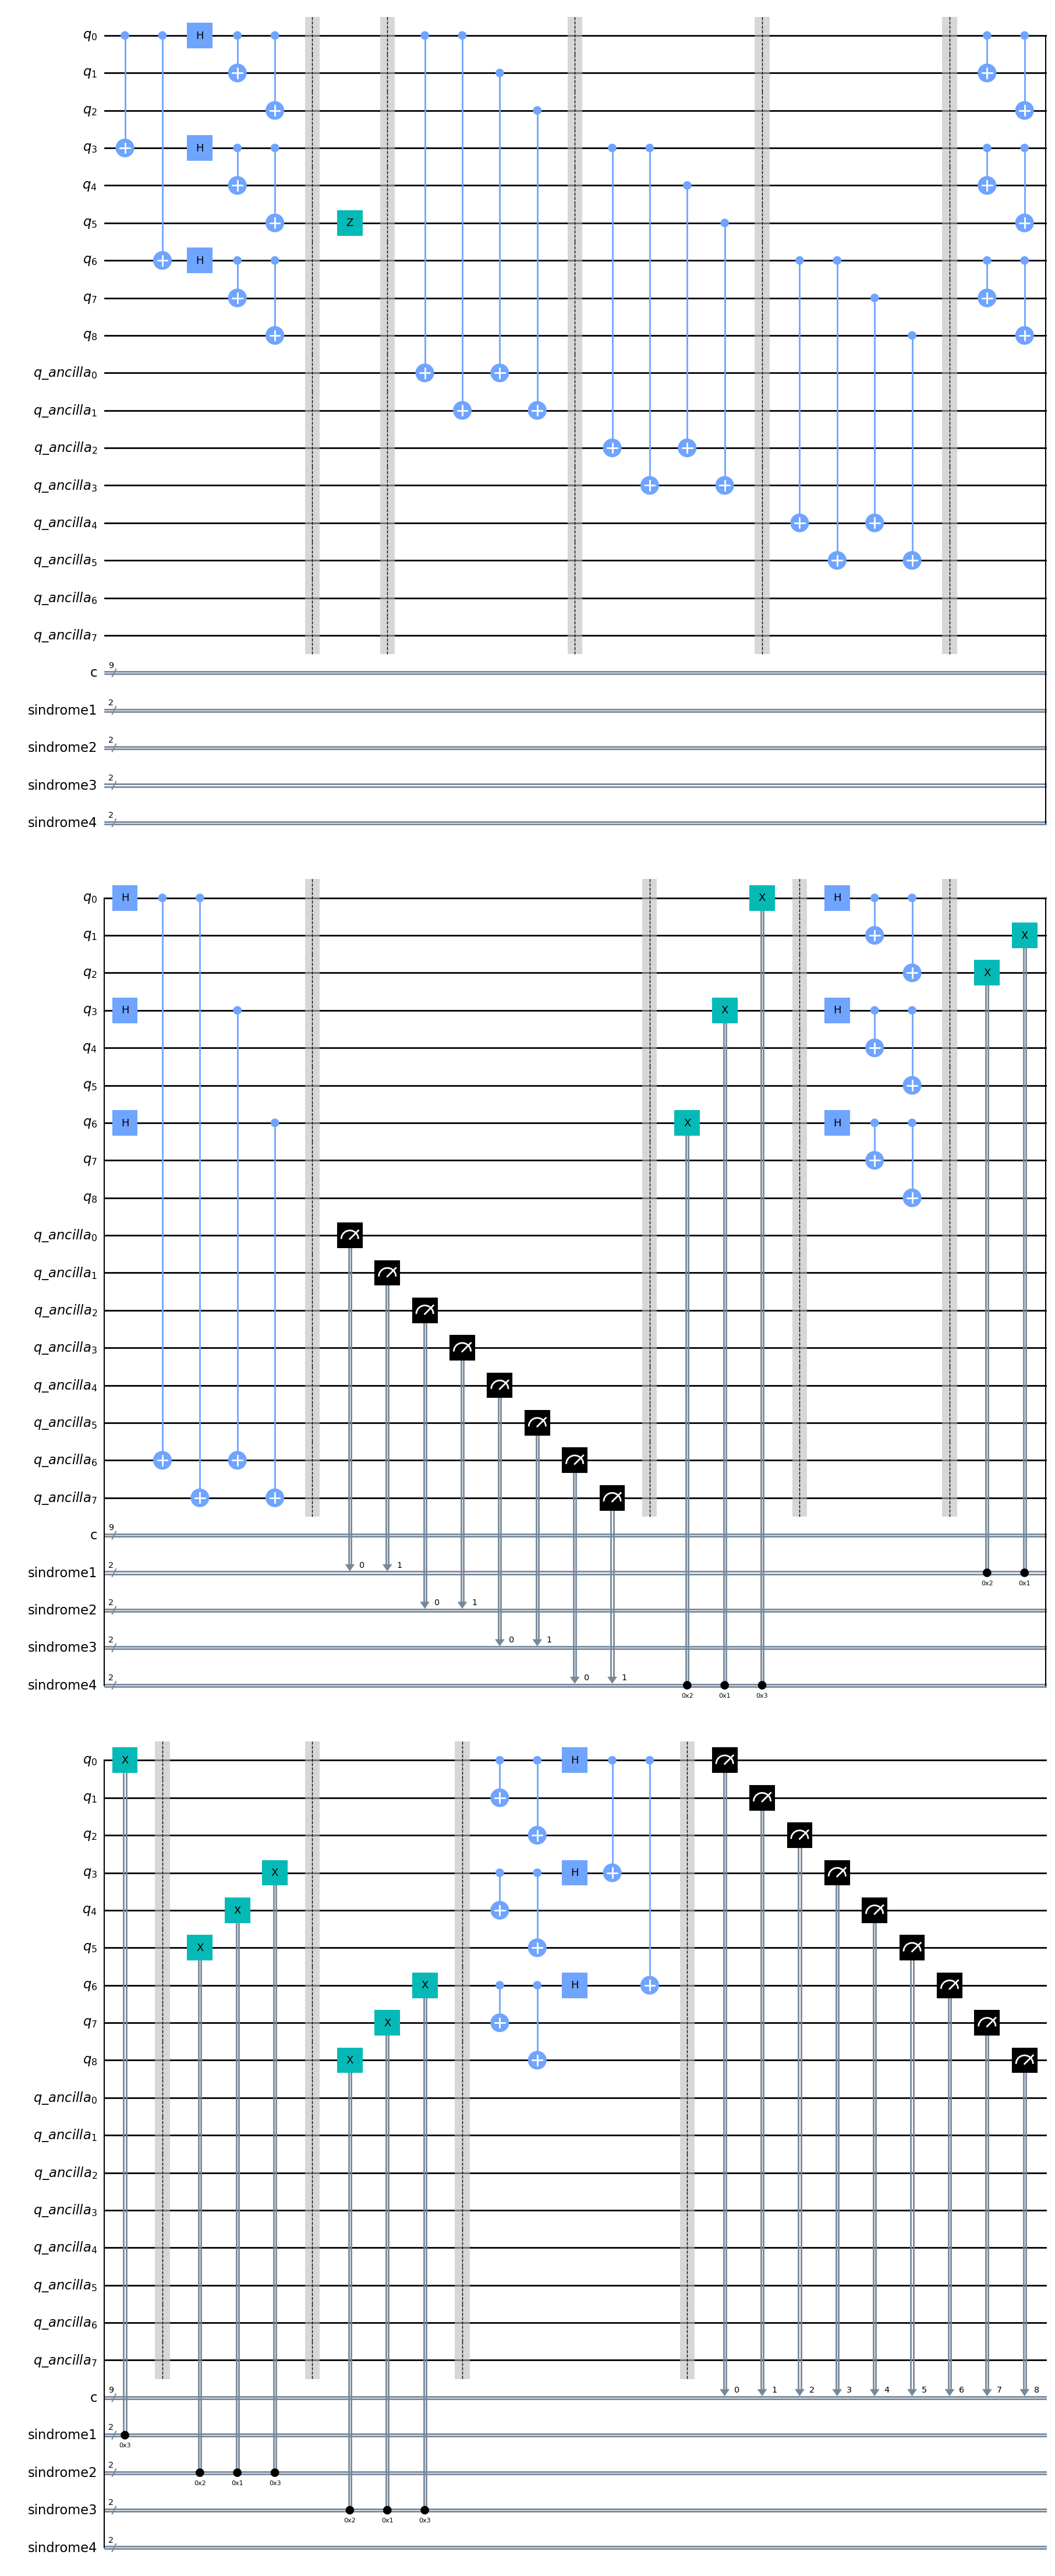

In [41]:
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
circuit.measure(qreg_q[5], creg_c[5])
circuit.measure(qreg_q[6], creg_c[6])
circuit.measure(qreg_q[7], creg_c[7])
circuit.measure(qreg_q[8], creg_c[8])

circuit.draw(output='mpl', style="clifford")


Circuito sin corregir

In [42]:
circuit_sincorregir.measure(qreg_q_sincorregir[0], creg_c_sincorregir[0])
circuit_sincorregir.measure(qreg_q_sincorregir[1], creg_c_sincorregir[1])
circuit_sincorregir.measure(qreg_q_sincorregir[2], creg_c_sincorregir[2])
circuit_sincorregir.measure(qreg_q_sincorregir[3], creg_c_sincorregir[3])
circuit_sincorregir.measure(qreg_q_sincorregir[4], creg_c_sincorregir[4])
circuit_sincorregir.measure(qreg_q_sincorregir[5], creg_c_sincorregir[5])
circuit_sincorregir.measure(qreg_q_sincorregir[6], creg_c_sincorregir[6])
circuit_sincorregir.measure(qreg_q_sincorregir[7], creg_c_sincorregir[7])
circuit_sincorregir.measure(qreg_q_sincorregir[8], creg_c_sincorregir[8])


In [43]:
result_sincorregir = execute(circuit_sincorregir, Aer.get_backend('qasm_simulator')).result()
print("Resultado circuito sin correción de errores: ")
print(result_sincorregir.get_counts())

Resultado circuito sin correción de errores: 
{'000001000': 1024}


In [44]:
result = execute(circuit, Aer.get_backend('qasm_simulator')).result()
print("Resultado circuito con correción de errores: ")
print(result.get_counts())

Resultado circuito con correción de errores: 
{'01 00 00 00 000000000': 1024}
